In [1]:
import numpy as np
import pandas as pd


In [108]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
df=pd.read_csv("spam.csv", encoding_errors= 'replace')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [38]:
df.shape

(5572, 5)

there are 5572 rows × 5 columns in this spam dataset

# About the Dataset
Columns

v1(label)

v2(email)

V1

Spam

Ham -> Not Spam

# Exploratory Data Analysis

[747, 4825]


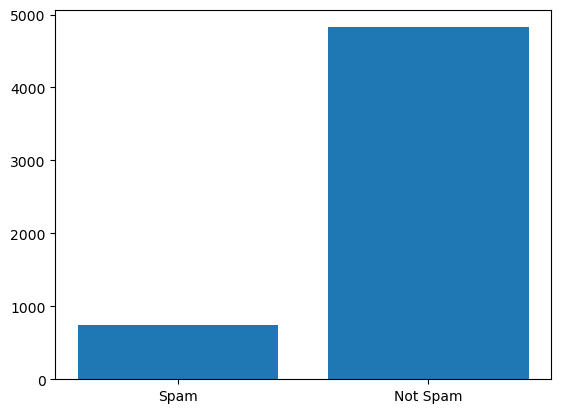

In [107]:
import matplotlib.pyplot as plt
spam = (df.loc[df['v1'] == 'spam'])['v1'].count()
notspam = ((df.loc[df['v1'] == 'ham'])['v1'].count())
labels = ['Spam', 'Not Spam']
values = [spam, notspam]
print(values)
plt.bar(labels,values)
plt.show()

# Out of the given training set of 5572 training examples the following is the compostion:
747 Spam

4825 Not Spam

In [40]:
import string
import nltk
from nltk.corpus import stopwords
def text_preprocess(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in  stopwords.words('english')]
    return " ".join(text)

# Preprocessing the text
Removing punctuations and stop words.

In [109]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download the stop words dataset if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Load your DataFrame
df = pd.read_csv("spam.csv", encoding_errors= 'replace')

# Function to remove punctuation and stop words from a given text
def process_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Join the tokens back into a string
    processed_text = ' '.join(tokens)
    
    return processed_text

# Apply the process_text function to the 'text' column in your DataFrame
df['processed_text'] = df['v2'].apply(process_text)

# Display the updated DataFrame
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,Nah dont think goes usf lives around though


In [54]:
from nltk.tokenize import RegexpTokenizer
tokeniser = RegexpTokenizer(r'w+')
df["v2"] = df["v2"].apply(lambda x: tokeniser.tokenize(x))
df[["v2"]]

,v2
0,"[w, w]"
1,[w]
2,"[w, w]"
3,[]
4,[]
...,...
5567,"[w, w]"
5568,[]
5569,[w]
5570,[w]


In [58]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,processed_text
0,ham,"[w, w]",NaN,NaN,NaN,Go jurong point crazy Available bugis n great ...
1,ham,[w],NaN,NaN,NaN,Ok lar Joking wif u oni
2,spam,"[w, w]",NaN,NaN,NaN,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,[],NaN,NaN,NaN,U dun say early hor U c already say
4,ham,[],NaN,NaN,NaN,Nah dont think goes usf lives around though
...,...,...,...,...,...,...
5567,spam,"[w, w]",NaN,NaN,NaN,2nd time tried 2 contact u U �750 Pound prize ...
5568,ham,[],NaN,NaN,NaN,� b going esplanade fr home
5569,ham,[w],NaN,NaN,NaN,Pity mood Soany suggestions
5570,ham,[w],NaN,NaN,NaN,guy bitching acted like id interested buying s...


# Vectorization
Feature Engineering

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df["processed_text"])

In [61]:
X=np.array(x.toarray())
np.shape(X)

(5572, 9329)

# Making the prediction vector by treating Spam as 1 and not spam as 0

In [93]:
y=[]
for pred in df['v1']:
    if(pred == 'spam'):
        y.append(1)
    else:
        y.append(0)

In [94]:
a= np.ones((np.shape(X)[0],1))
X = np.append(a,X,axis=1)
np.shape(X)

(5572, 9332)

# Splitting the test Data

In [95]:
#Splitting the test data
from sklearn.model_selection import train_test_split
(TrainX,ValuateX,Trainy,Valuatey) = train_test_split(X,y,random_state=1)

The data set has been split into 2 parts, one to train the model and the other to Evaluate the accuracy of the model

In [96]:
print(np.shape(TrainX))
print(np.shape(Trainy))

(4179, 9332)
(4179,)


In [97]:
print(np.shape(ValuateX))
print(np.shape(Valuatey))

(1393, 9332)
(1393,)


# Solving Logistic Regression by calculating the parameters through Gradient Descent
The Hypothesis
In the case of Logistic Regression the Hypothesis is of the form, hypothesis = sigmoid(Transpose(theta)X)**

In [98]:
import math
def hypothesis(theta,X):
    h = -1*(np.matmul(X,theta))
    h = 1/(1+np.exp(h))
    return h

# The Cost Function

In [99]:
def cost(theta,X,y,m):
    t1 = np.ones(np.shape(y)[0])
    h = hypothesis(theta,X)
    t2 = np.ones(np.shape(h)[0])
    c = np.sum((y*np.log(h)) +((t1+y)*np.log(t2-h) ))/m
    return c

# Applying Gradient Descent

In [101]:
def gradientDescent(theta,X,y,m,alpha,it):
    iteration = []
    c = []
    for i in range(0,it):
       # d = alpha*((hypothesis(theta,X)-y)*X)
        d = hypothesis(theta,X)-y
        d = np.sum((X*d[0])*alpha,axis=0)
       # print(np.shape(d))
        theta = theta - d
        temp = cost(theta,X,y,m)
        #print(temp)
        c.append(-1*cost(theta,X,y,m))
        iteration.append(i)
    return(theta,iteration,c)


In [102]:
np.shape(TrainX)[1] #no of features
theta = np.zeros(np.shape(TrainX)[1])
np.shape(TrainX)
(theta,i,c) = gradientDescent(theta,TrainX,Trainy,np.shape(TrainX[0]),0.000001,2000)

# Plotting the cost function vs Iterations to check the proper functioning of Gradient descent and check the value of parameter alpha.

Text(0, 0.5, 'Cost function ->')

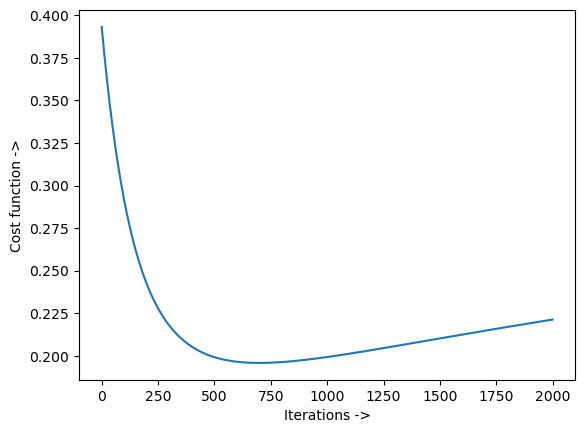

In [103]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(i,c)
plt.xlabel('Iterations ->')
plt.ylabel('Cost function ->')

# The cost function decreases with time and approaches a constant value, therefore the computed parameters are acceptable.
The following value of thetas form our hypothesis in the form H=sigmoid(X.Theta)

In [104]:
theta

array([-1.02705721e+00, -1.02705721e+00, -1.02705721e+00, ...,
       -2.45766263e-04, -2.45766263e-04, -2.45766263e-04])

In [105]:
unique_classes = np.unique(Trainy)
print("Unique Classes:", unique_classes)

Unique Classes: [0 1]


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Spam_model.fit(TrainX, Trainy)
pred = Spam_model.predict(ValuateX)
accuracy_score(Valuatey,pred)

0.9806173725771715

# An accuracy of around 98 percent is Achieved while using this model.